In [ ]:
import pandas as pd
import numpy as np
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/50_Startups_dataset.csv")

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.30,136897.90,471784.20,New York,192261.93
1,162597.80,151377.69,443898.63,California,191792.16
2,153441.61,101145.65,407934.64,Florida,191050.49
3,144372.51,118671.95,383199.72,New York,182902.09
4,142107.44,91391.87,366168.52,Florida,166188.04


In [ ]:
df.shape

(50, 5)

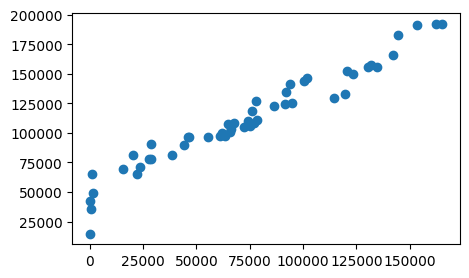

In [ ]:
#Relation between the features =>
plt.figure(figsize=(5,3))
plt.scatter(df['R&D Spend'],df['Profit'])
plt.show()

In [ ]:
df['New York']=np.where(df['State']=='New York',1,0)
df['California']=np.where(df['State']=='California',1,0)
df['Florida']=np.where(df['State']=='Florida',1,0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
 5   New York         50 non-null     int64  
 6   California       50 non-null     int64  
 7   Florida          50 non-null     int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 3.2+ KB


In [ ]:
df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit,New York,California,Florida
0,165349.30,136897.90,471784.20,New York,192261.93,1,0,0
1,162597.80,151377.69,443898.63,California,191792.16,0,1,0
2,153441.61,101145.65,407934.64,Florida,191050.49,0,0,1


In [ ]:
df.drop(columns=['State'],inplace=True)

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,New York,California,Florida
0,165349.30,136897.90,471784.20,192261.93,1,0,0
1,162597.80,151377.69,443898.63,191792.16,0,1,0
2,153441.61,101145.65,407934.64,191050.49,0,0,1
3,144372.51,118671.95,383199.72,182902.09,1,0,0
4,142107.44,91391.87,366168.52,166188.04,0,0,1


In [ ]:
#Now convert the data into dependent and independent variable=>
dependent_variable=df['Profit']

In [ ]:
df.drop(columns=['Profit'],inplace=True)

In [ ]:
dependent_variable

0     192261.93
1     191792.16
2     191050.49
3     182902.09
4     166188.04
5     156991.22
6     156122.61
7     155752.70
8     152211.87
9     149760.06
10    146122.05
11    144259.50
12    141585.62
13    134307.45
14    132602.75
15    129917.14
16    126993.03
17    125370.47
18    124267.00
19    122776.96
20    118474.13
21    111313.12
22    110352.35
23    108734.09
24    108552.14
25    107404.44
26    105733.64
27    105008.41
28    103282.48
29    101004.74
30     99937.69
31     97483.66
32     97427.94
33     96779.02
34     96712.90
35     96479.61
36     90708.29
37     89949.24
38     81229.16
39     81005.86
40     78240.01
41     77798.93
42     71498.59
43     69759.08
44     65200.43
45     64926.18
46     49490.85
47     42559.83
48     35673.51
49     14681.50
Name: Profit, dtype: float64

In [ ]:
independent_variable=df

In [ ]:
independent_variable

,R&D Spend,Administration,Marketing Spend,New York,California,Florida
0,165349.30,136897.90,471784.20,1,0,0
1,162597.80,151377.69,443898.63,0,1,0
2,153441.61,101145.65,407934.64,0,0,1
3,144372.51,118671.95,383199.72,1,0,0
4,142107.44,91391.87,366168.52,0,0,1
5,131877.00,99814.81,362861.46,1,0,0
6,134615.56,147198.97,127716.92,0,1,0
7,130298.23,145530.16,323876.78,0,0,1
8,120542.62,148719.05,311613.39,1,0,0
9,123334.98,108679.27,304981.72,0,1,0


In [ ]:
x=independent_variable
y=dependent_variable

In [ ]:
#Spliting the data set into train  and test from
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
x_train[:10]

,R&D Spend,Administration,Marketing Spend,New York,California,Florida
33,55494.05,103057.59,214634.91,0,0,1
35,46014.12,85047.54,205517.74,1,0,0
26,75328.97,144136.08,134050.17,0,0,1
34,46426.17,157694.02,210797.77,0,1,0
18,91749.26,114175.89,294919.67,0,0,1
7,130298.23,145530.16,323876.78,0,0,1
14,119943.34,156547.52,256513.02,0,0,1
45,1000.33,124153.14,1904.03,1,0,0
48,542.15,51743.25,0.10,1,0,0
29,65605.58,153032.16,107138.48,1,0,0


In [ ]:
y_test[:]

28    103282.48
11    144259.50
10    146122.05
41     77798.93
2     191050.49
27    105008.41
38     81229.16
31     97483.66
22    110352.35
4     166188.04
Name: Profit, dtype: float64

In [ ]:
x_test[:]

,R&D Spend,Administration,Marketing Spend,New York,California,Florida
28,66051.62,182645.66,118148.30,0,0,1
11,100672.06,91790.71,249744.65,0,1,0
10,101913.18,110594.21,229161.05,0,0,1
41,27893.02,84710.87,164470.81,0,0,1
2,153441.61,101145.65,407934.64,0,0,1
27,72107.70,127864.65,353183.91,1,0,0
38,20229.69,65948.03,185265.20,1,0,0
31,61136.48,152702.02,88218.33,1,0,0
22,73994.66,122782.85,303319.36,0,0,1
4,142107.44,91391.87,366168.52,0,0,1


In [ ]:
y_train[:10]

33     96779.02
35     96479.61
26    105733.64
34     96712.90
18    124267.00
7     155752.70
14    132602.75
45     64926.18
48     35673.51
29    101004.74
Name: Profit, dtype: float64

In [ ]:
#Transform the data in Normalize(0 to 1) form =>
scalar=MinMaxScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [ ]:
x_train[:10]

array([[0.33561668, 0.48655174, 0.45494286, 0.        , 0.        ,
        1.        ],
       [0.2782839 , 0.3173015 , 0.43561799, 1.        , 0.        ,
        0.        ],
       [0.45557444, 0.87258866, 0.28413435, 0.        , 0.        ,
        1.        ],
       [0.2807759 , 1.        , 0.44680961, 0.        , 1.        ,
        0.        ],
       [0.55488118, 0.59103645, 0.62511553, 0.        , 0.        ,
        1.        ],
       [0.7880179 , 0.88568959, 0.68649342, 0.        , 0.        ,
        1.        ],
       [0.72539353, 0.98922572, 0.54370828, 0.        , 0.        ,
        1.        ],
       [0.0060492 , 0.6847981 , 0.0040356 , 1.        , 0.        ,
        0.        ],
       [0.00327821, 0.00432296, 0.        , 1.        , 0.        ,
        0.        ],
       [0.39676926, 0.95618996, 0.22709197, 1.        , 0.        ,
        0.        ]])

In [ ]:
x_test[:]

array([[0.39946683, 1.23448414, 0.25042853, 0.        , 0.        ,
        1.        ],
       [0.60884455, 0.38067074, 0.52936195, 0.        , 1.        ,
        0.        ],
       [0.61635061, 0.55737746, 0.48573267, 0.        , 0.        ,
        1.        ],
       [0.16869099, 0.31413763, 0.34861436, 0.        , 0.        ,
        1.        ],
       [0.92798459, 0.4685842 , 0.8646636 , 0.        , 0.        ,
        1.        ],
       [0.43609283, 0.71967718, 0.74861321, 1.        , 0.        ,
        0.        ],
       [0.12234465, 0.13781301, 0.39269043, 1.        , 0.        ,
        0.        ],
       [0.36974101, 0.95308746, 0.18698856, 1.        , 0.        ,
        0.        ],
       [0.4475048 , 0.67192074, 0.64291963, 0.        , 0.        ,
        1.        ],
       [0.85943772, 0.37692262, 0.77613557, 0.        , 0.        ,
        1.        ]])

In [ ]:
#Implement tha linear Regression=>
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
regressor.intercept_

44154.05466784858

In [ ]:
regressor.coef_

array([ 1.27892182e+05,  3.49927567e+03,  1.72720281e+04,  7.86007422e+02,
        8.66383692e+01, -8.72645791e+02])

In [ ]:
#Predection
y_pred_train=regressor.predict(x_train)

In [ ]:
y_train[:10]

33     96779.02
35     96479.61
26    105733.64
34     96712.90
18    124267.00
7     155752.70
14    132602.75
45     64926.18
48     35673.51
29    101004.74
Name: Profit, dtype: float64

In [ ]:
y_pred_train[:10].round(0)

array([ 95765.,  89165., 109507.,  91366., 127112., 159019., 148906.,
        48180.,  45374., 102952.])

In [ ]:
y_pred_test=regressor.predict(x_test)

In [ ]:
y_test

28    103282.48
11    144259.50
10    146122.05
41     77798.93
2     191050.49
27    105008.41
38     81229.16
31     97483.66
22    110352.35
4     166188.04
Name: Profit, dtype: float64

In [ ]:
y_pred_test.round(2)

array([103015.3 , 132582.38, 132447.84,  71976.2 , 178537.58, 116161.34,
        67851.79,  98791.83, 113969.54, 167921.17])

In [ ]:
#Model Sequence
#r2 score
r2_score(y_train,y_pred_train)

0.9501847627493607

In [ ]:
r2_score(y_test,y_pred_test)

0.9347068473282424

In [ ]:
#Ridge Regression=>
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,55,100]}
ridge_regressor=GridSearchCV(ridge,params,scoring="neg_mean_squared_error",cv=5)
ridge_regressor.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.00136e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.73242e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.3302e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.36488e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
ridge_regressor.best_params_

{'alpha': 0.01}

In [ ]:
ridge_regressor.best_score_

-143190282.05467173

In [ ]:
#Lasso Regression=>
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,55,100]}
lasso_regressor=GridSearchCV(lasso,params,scoring="neg_mean_squared_error",cv=5)
lasso_regressor.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.091e+09, tolerance: 6.011e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.332e+09, tolerance: 5.722e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.317e+08, tolerance: 4.896e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_regressor.best_params_

{'alpha': 100}

In [ ]:
lasso_regressor.best_score_

-136085422.92581886

In [ ]:
y_pred_test=regressor.predict(x_test)
r2_score=r2_score(y_pred_test,y_test)
r2_score

0.929374920931811